## Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

## Data Visualization and Wrangling

In [3]:
print("Train Data Shape : {}".format(train.shape))
print("Test Data Shape : {}".format(test.shape))

Train Data Shape : (42000, 785)
Test Data Shape : (28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### NaN Value

In [5]:
train.isnull().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

### Label Distribution 

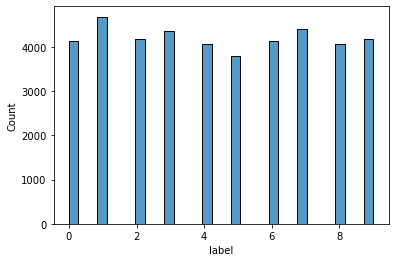

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('label')
sns.histplot(data=train , x='label');

In [7]:
print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))

Train Shape : (42000, 785)
Test Shape : (28000, 784)


## Spliting Data

In [8]:
y = train['label']
X = train.drop(['label'], axis=1)

In [9]:
print("Y Shape : {}".format(y.shape))
print("X Shape : {}".format(X.shape))

Y Shape : (42000,)
X Shape : (42000, 784)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y,test_size= 0.2 , random_state=123)

### Normalizing Data

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape:", X_train.shape)
print("X_test.shape", X_test.shape)


X_train.shape: (33600, 784)
X_test.shape (8400, 784)


In [12]:
#Converting X Features into 3D data  
X_train = X_train.values.reshape(-1,28,28, 1)
X_test = X_test.values.reshape(-1, 28,28, 1)

print("X_train.shape:", X_train.shape)
print("X_test.shape", X_test.shape)

X_train.shape: (33600, 28, 28, 1)
X_test.shape (8400, 28, 28, 1)


In [13]:
#Finding Number of Class 
K = len(set(y_train))

print("number of classes:", K)

number of classes: 10


In [14]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.summary()

2023-01-29 16:09:38.367820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 16:09:38.368824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 16:09:38.512765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 16:09:38.513646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 16:09:38.514502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312

In [15]:
# sparse_categorical_crossentropy to convert Y value in to One hot encoding target value.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

2023-01-29 16:09:42.474187: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-29 16:09:44.250252: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 13s 4ms/step - loss: 0.2376 - accuracy: 0.9266 - val_loss: 0.0861 - val_accuracy: 0.9744
Epoch 2/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0851 - accuracy: 0.9731 - val_loss: 0.0672 - val_accuracy: 0.9789
Epoch 3/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0579 - accuracy: 0.9816 - val_loss: 0.0583 - val_accuracy: 0.9814
Epoch 4/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0467 - accuracy: 0.9847 - val_loss: 0.0594 - val_accuracy: 0.9812
Epoch 5/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0521 - val_accuracy: 0.9849
Epoch 6/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0254 - accuracy: 0.9910 - val_loss: 0.0544 - val_accuracy: 0.9850
Ep

## Visualizing Resutls

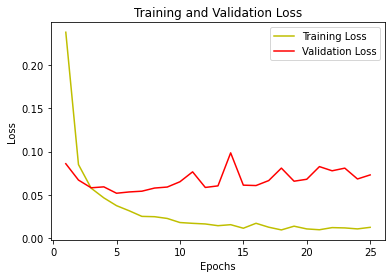

In [17]:
import matplotlib.pyplot as plt
loss = r.history['loss']
val_loss=r.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs , val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

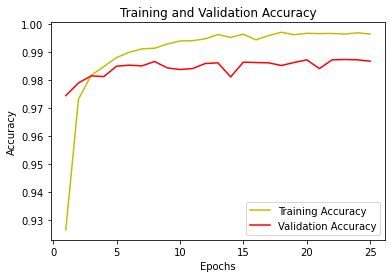

In [18]:
import matplotlib.pyplot as plt
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs , val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,y_pred)
print("               Predicted Label")
print(cm)

               Predicted Label
[[781   0   0   0   0   0   2   2   0   0]
 [  0 944   1   1   1   0   0   1   1   0]
 [  1   1 824   1   2   0   0   7   2   0]
 [  0   0   2 848   0   1   0   3   3   1]
 [  0   1   0   0 786   0   1   0   1   7]
 [  1   0   0   7   3 779   1   0   2   7]
 [  1   1   0   0   0   3 865   0   0   0]
 [  0   2   5   1   1   0   0 850   0   1]
 [  3   2   1   0   1   1   0   1 806   2]
 [  2   2   0   1  10   2   0   5   0 805]]


## Predecting With Test Data

In [20]:
#Reshaping test data
test_df = test / 255.0
test_df = test_df.values.reshape(-1,28,28,1)

In [21]:
print("Test Data Shape : {}".format(test_df.shape))

Test Data Shape : (28000, 28, 28, 1)


In [22]:
pred = model.predict(test_df)

In [23]:
classes = pred.argmax(axis=-1)
classes

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
label_var = pd.DataFrame(classes, columns =['Class'])
sub = pd.concat([submission, label_var], axis = 1)
sub.Class = label_var
sub.head()

,ImageId,Label,Class
0,1,0,2
1,2,0,0
2,3,0,9
3,4,0,9
4,5,0,3


In [26]:
## Submiting the work 
sub = sub[['ImageId','Class']]


In [27]:
sub = sub.rename(columns={'Class': 'Label'})

In [28]:
sub.to_csv('submission.csv',index=False)

pd.read_csv('submission.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
